In [1]:
import tweepy
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import string
plt.style.use('fivethirtyeight')

In [2]:
consumer_key = '4BOipt3PaHlxJvf4tH8aerK7ws'
consumer_secret = 'ZQS5oFEZUUFcuN5IzMY6CR7YCwJ79onD7FJNQfVAO90AanentT'
access_token = '1471394029283667971-QmU0OY8tBqmJfx0yFXfT3a0EVn4nfk'
access_token_secret = 'wf1TN5plDQevrCP9MMHLOJHGuDyI0R1SfUBp8UMNoITGx'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
text = []
cursor = tweepy.Cursor(api.search_tweets, q = "#garyvee", tweet_mode = "extended").items(1000)

for i in cursor:
    text.append(i.full_text)

text

['RT @ptownsurf: #ELON1 #GARYVEE #veefriends #ELONONE we love us some Gary! Whitepaper https://t.co/G31FkPaOHl\n\nLiquidity locked for 100 year…',
 'RT @oberon_joff: Welcoming the man @garyvee to @QuarterMachine !! STiCKER POX \n\nhttps://t.co/1nsEdpU5D7\n\n#NFTS #nft #NFTCommunity #nftartis…',
 'garyvee: RT @garyvee: @blake_hagz @winetexts Amazon outage and some issues after it … still working it #garyvee #garyvaynerchuck',
 'garyvee: @blake_hagz @winetexts Amazon outage and some issues after it … still working it #garyvee #garyvaynerchuck',
 'garyvee: @LaMotoguzzi @octopad_eth @veefriends I think about 40’s a lot :) #garyvee #garyvaynerchuck',
 'garyvee: @clyndonsmith @BAYC967 @BoredApeYC @weareround21 Love u #garyvee #garyvaynerchuck',
 'garyvee: @BAYC967 @BoredApeYC @weareround21 Thinking about u #garyvee #garyvaynerchuck',
 'garyvee: @HoganCory Yes #garyvee #garyvaynerchuck',
 'garyvee: Home base https://t.co/ZXvPEFAnjK #garyvee #garyvaynerchuck',
 'garyvee: pls join us https://t.

In [5]:
text = [re.sub('#[A-Za-z0-9]+', '', x) for x in text]
text = [re.sub('\\n', '', x) for x in text]
text = [re.sub('https?:\/\/\S+', '', x) for x in text]

In [6]:
a = set(stopwords.words('english'))
stem = [x for x in text  if x not in a]
stem

['@ptownsurf:     we love us some Gary! Whitepaper  locked for 100 year…',
 '@oberon_joff: Welcoming the man @garyvee to @QuarterMachine !! STiCKER POX    …',
 'garyvee: @garyvee: @blake_hagz @winetexts Amazon outage and some issues after it … still working it  ',
 'garyvee: @blake_hagz @winetexts Amazon outage and some issues after it … still working it  ',
 'garyvee: @LaMotoguzzi @octopad_eth @veefriends I think about 40’s a lot :)  ',
 'garyvee: @clyndonsmith @BAYC967 @BoredApeYC @weareround21 Love u  ',
 'garyvee: @BAYC967 @BoredApeYC @weareround21 Thinking about u  ',
 'garyvee: @HoganCory Yes  ',
 'garyvee: Home base   ',
 'garyvee: pls join us  its going down in "the cord" ...a lot of announcements coming in there   ',
 'garyvee: @jesterhikes: Thanks @ProjectSandlot ! The @garyvee community is awesome!! 💯🧡   ',
 'garyvee: @escapistaa im lucky too :)  ',
 'garyvee: 40 minutes or so until todays @winetexts drops … in hyped   ',
 'garyvee: love gregg and love being involved with @H

In [7]:
data = pd.DataFrame(stem, columns = ['Cleaned Tweets'])
data

,Cleaned Tweets
0,@ptownsurf: we love us some Gary! Whitepap...
1,@oberon_joff: Welcoming the man @garyvee to @Q...
2,garyvee: @garyvee: @blake_hagz @winetexts Amaz...
3,garyvee: @blake_hagz @winetexts Amazon outage ...
4,garyvee: @LaMotoguzzi @octopad_eth @veefriends...
...,...
995,@tmmarks: “For me it’s simple to deal with tho...
996,"@tmmarks: “But that boss, likely cynical or in..."
997,@tmmarks: “The boss might look as though he or...
998,@tmmarks: “If I were working at a corporation ...


In [8]:
def getSubjectivity(stem):
    return TextBlob(stem).sentiment.subjectivity

def getPolarity(stem):
    return TextBlob(stem).sentiment.polarity

data['Subjectivity'] = data['Cleaned Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Cleaned Tweets'].apply(getPolarity)

data

,Cleaned Tweets,Subjectivity,Polarity
0,@ptownsurf: we love us some Gary! Whitepap...,0.600000,6.250000e-01
1,@oberon_joff: Welcoming the man @garyvee to @Q...,0.000000,0.000000e+00
2,garyvee: @garyvee: @blake_hagz @winetexts Amaz...,0.000000,0.000000e+00
3,garyvee: @blake_hagz @winetexts Amazon outage ...,0.000000,0.000000e+00
4,garyvee: @LaMotoguzzi @octopad_eth @veefriends...,1.000000,5.000000e-01
...,...,...,...
995,@tmmarks: “For me it’s simple to deal with tho...,0.374603,-2.333333e-01
996,"@tmmarks: “But that boss, likely cynical or in...",0.893750,-3.750000e-01
997,@tmmarks: “The boss might look as though he or...,0.555556,-3.700743e-17
998,@tmmarks: “If I were working at a corporation ...,0.000000,0.000000e+00


In [9]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
    
data['Sentiment'] = data['Polarity'].apply(getSentiment)

data

,Cleaned Tweets,Subjectivity,Polarity,Sentiment
0,@ptownsurf: we love us some Gary! Whitepap...,0.600000,6.250000e-01,positive
1,@oberon_joff: Welcoming the man @garyvee to @Q...,0.000000,0.000000e+00,neutral
2,garyvee: @garyvee: @blake_hagz @winetexts Amaz...,0.000000,0.000000e+00,neutral
3,garyvee: @blake_hagz @winetexts Amazon outage ...,0.000000,0.000000e+00,neutral
4,garyvee: @LaMotoguzzi @octopad_eth @veefriends...,1.000000,5.000000e-01,positive
...,...,...,...,...
995,@tmmarks: “For me it’s simple to deal with tho...,0.374603,-2.333333e-01,negative
996,"@tmmarks: “But that boss, likely cynical or in...",0.893750,-3.750000e-01,negative
997,@tmmarks: “The boss might look as though he or...,0.555556,-3.700743e-17,negative
998,@tmmarks: “If I were working at a corporation ...,0.000000,0.000000e+00,neutral


In [10]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['Tokenized Tweets'] = data['Cleaned Tweets'].apply(tokenize)

data

,Cleaned Tweets,Subjectivity,Polarity,Sentiment,Tokenized Tweets
0,@ptownsurf: we love us some Gary! Whitepap...,0.600000,6.250000e-01,positive,"[, ptownsurf, we, love, us, some, Gary, Whitep..."
1,@oberon_joff: Welcoming the man @garyvee to @Q...,0.000000,0.000000e+00,neutral,"[, oberon_joff, Welcoming, the, man, garyvee, ..."
2,garyvee: @garyvee: @blake_hagz @winetexts Amaz...,0.000000,0.000000e+00,neutral,"[garyvee, garyvee, blake_hagz, winetexts, Amaz..."
3,garyvee: @blake_hagz @winetexts Amazon outage ...,0.000000,0.000000e+00,neutral,"[garyvee, blake_hagz, winetexts, Amazon, outag..."
4,garyvee: @LaMotoguzzi @octopad_eth @veefriends...,1.000000,5.000000e-01,positive,"[garyvee, LaMotoguzzi, octopad_eth, veefriends..."
...,...,...,...,...,...
995,@tmmarks: “For me it’s simple to deal with tho...,0.374603,-2.333333e-01,negative,"[, tmmarks, For, me, it, s, simple, to, deal, ..."
996,"@tmmarks: “But that boss, likely cynical or in...",0.893750,-3.750000e-01,negative,"[, tmmarks, But, that, boss, likely, cynical, ..."
997,@tmmarks: “The boss might look as though he or...,0.555556,-3.700743e-17,negative,"[, tmmarks, The, boss, might, look, as, though..."
998,@tmmarks: “If I were working at a corporation ...,0.000000,0.000000e+00,neutral,"[, tmmarks, If, I, were, working, at, a, corpo..."


Text(0, 0.5, 'Subjectivity')

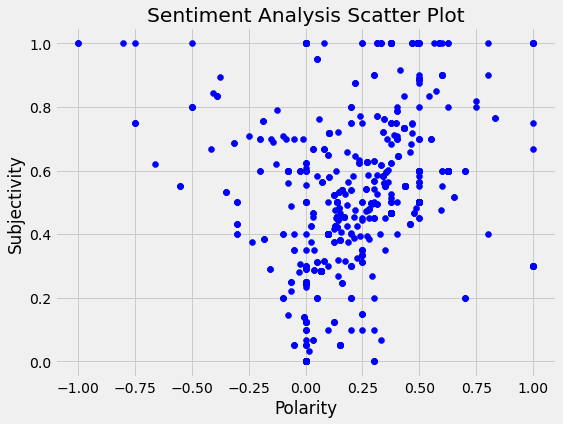

In [11]:
plt.figure(figsize =(8,6))
for i in range(0, data.shape[0]):
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color="Blue")
    
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

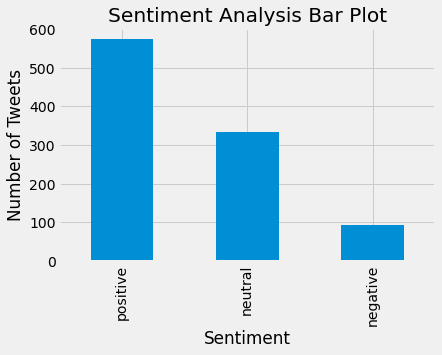

In [12]:
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()